# Project: Titanic Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

We will explore Titanic Dataset from Kaggle and will implement Machine Learning model to predict the Survival chance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("Data/titanic_data.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


-----

<a id='eda'></a>
# Exploratory data analysis (EDA)

### Number of Survived Passengers

In [6]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

It seem like 342 peple survived.

### Gender Distribution

In [7]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

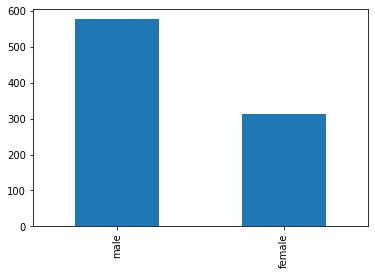

In [8]:
data["Sex"].value_counts().plot(kind = "bar");

### Fare Distribution

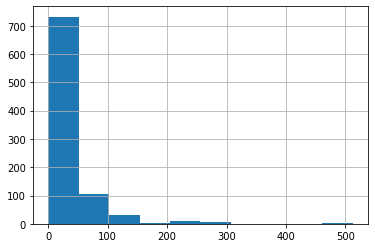

In [9]:
data["Fare"].hist();

---------

## Bar Charts plot for categorical features
- PClass 
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [10]:
def bar_chart(feature):
    survived = data[data["Survived"] == 1][feature].value_counts()
    not_survived = data[data["Survived"] == 0][feature].value_counts()
    data_new = pd.DataFrame([survived, not_survived])
    data_new.index = ["Survived", "Dead"]
    data_new.plot(kind = "bar", stacked = True, figsize = (10, 5))
    
def total_ratio(feature):
    total = data[feature].count()
    print("Total Passenger: ", total)
    print()
    survived = (data[data["Survived"] == 1][feature].value_counts() / total) * 100
    not_survived = (data[data["Survived"] == 0][feature].value_counts() /total) * 100
    print("Survival Ratio %")
    print(survived)
    print()
    print("Not Survival Ratio %")
    print(not_survived)

### Survival by Gender

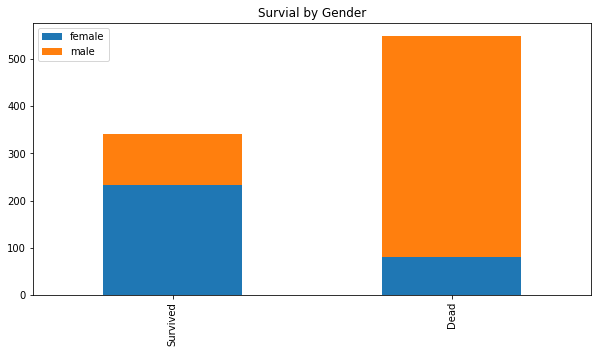

In [11]:
bar_chart("Sex")
plt.title("Survial by Gender");

It seems like more Female survived than Male passengers.

In [12]:
total_ratio("Sex")

Total Passenger:  891

Survival Ratio %
female    26.150393
male      12.233446
Name: Sex, dtype: float64

Not Survival Ratio %
male      52.525253
female     9.090909
Name: Sex, dtype: float64


-------

### Survival by Pclass

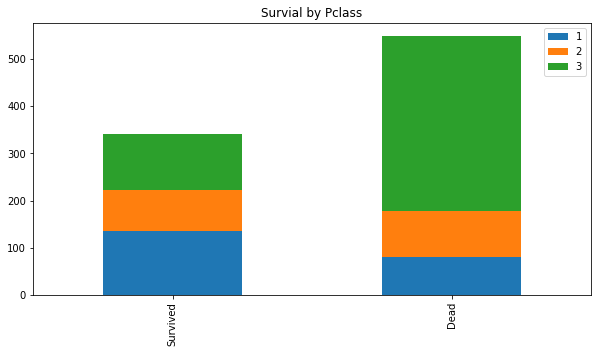

In [13]:
bar_chart("Pclass")
plt.title("Survial by Pclass");

In [14]:
total_ratio("Pclass")

Total Passenger:  891

Survival Ratio %
1    15.263749
3    13.355780
2     9.764310
Name: Pclass, dtype: float64

Not Survival Ratio %
3    41.750842
2    10.886644
1     8.978676
Name: Pclass, dtype: float64


-------

### Survival by Sibsp

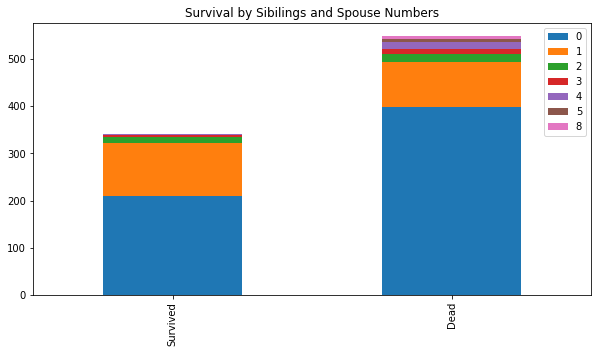

In [15]:
bar_chart("SibSp")
plt.title("Survival by Sibilings and Spouse Numbers");

In [16]:
total_ratio("SibSp")

Total Passenger:  891

Survival Ratio %
0    23.569024
1    12.570146
2     1.459035
3     0.448934
4     0.336700
Name: SibSp, dtype: float64

Not Survival Ratio %
0    44.668911
1    10.886644
4     1.683502
2     1.683502
3     1.346801
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


---------

### Survival by Parch

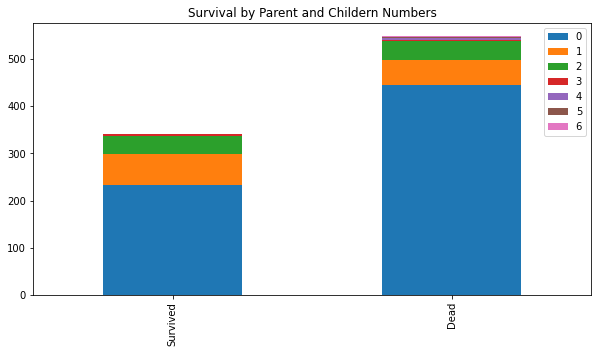

In [17]:
bar_chart("Parch")
plt.title("Survival by Parent and Childern Numbers");

In [18]:
total_ratio("Parch")

Total Passenger:  891

Survival Ratio %
0    26.150393
1     7.295174
2     4.489338
3     0.336700
5     0.112233
Name: Parch, dtype: float64

Not Survival Ratio %
0    49.943883
1     5.948373
2     4.489338
5     0.448934
4     0.448934
3     0.224467
6     0.112233
Name: Parch, dtype: float64


### Survival by Title
it may not make sense. but we will explore this too.

In [19]:
temp = data
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#extract title from Name column
title = temp["Name"].apply(lambda name: name.split(", ")[1].split(".")[0])

In [21]:
title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
the Countess      1
Jonkheer          1
Mme               1
Don               1
Lady              1
Ms                1
Sir               1
Capt              1
Name: Name, dtype: int64

In [22]:
data["Title"] = data["Name"].apply(lambda name: name.split(", ")[1].split(".")[0])
# temp_list = [data]

# for passenger in temp_list:
#     passenger["Title"] = passenger["Name"].str.extract(" ([A-Za-z]+)\.", expand = False)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
# type(temp_list)

In [25]:
# temp_list

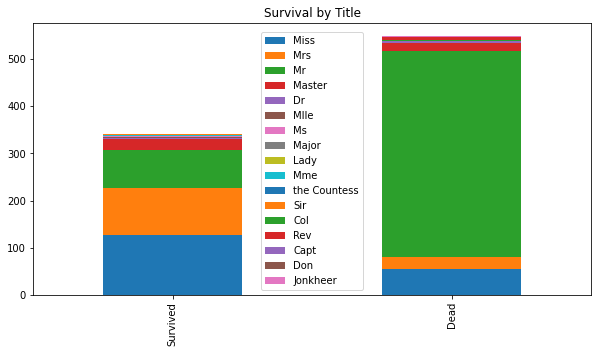

In [26]:
bar_chart("Title")
plt.title("Survival by Title");

In [27]:
total_ratio("Title")

Total Passenger:  891

Survival Ratio %
Miss            14.253648
Mrs             11.111111
Mr               9.090909
Master           2.581369
Dr               0.336700
Mlle             0.224467
Ms               0.112233
Major            0.112233
Lady             0.112233
Mme              0.112233
the Countess     0.112233
Sir              0.112233
Col              0.112233
Name: Title, dtype: float64

Not Survival Ratio %
Mr          48.933782
Miss         6.172840
Mrs          2.918070
Master       1.907969
Rev          0.673401
Dr           0.448934
Capt         0.112233
Major        0.112233
Don          0.112233
Jonkheer     0.112233
Col          0.112233
Name: Title, dtype: float64


-------

<a id = "wrangling"></a>
# Data Cleaning

## Mapping the features to Numbers

### Change `Title` column values to Numbers

In [28]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

In [29]:
title_mapping = {"Mr": 0, "Miss":1, "Mrs": 2, "Ms": 1,
                            "Sir": 3,"Master": 3, "Rev": 3, "Dr": 3, "Capt": 3, "Major": 3, "Col": 3,  "Jonkheer": 3, "Don": 3, "Mlle": 3, "Mme": 3, "Lady": 3, "the Countess": 3, "Dona": 3}

In [30]:
temp_list = [data]

for passenger in temp_list:
    passenger["Title"] = passenger["Title"].map(title_mapping)

In [31]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


### Change `Sex` column values to Number

In [32]:
data.replace(["male", "female"], ["1", "0"], inplace = True)

In [33]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2


--------

# Handling Missing Values

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [35]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

It seems like Age, Cabin and Embarked columns have some missing values.

### Fill mean value for `Age` null values

In [36]:
#mean Age by "sex" and "pclass"
mean_age = data.groupby(["Sex", "Pclass"])["Age"].mean()
mean_age

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [37]:
# function to fill the null age values
def fill_nan_age(row):
    if pd.isnull(row["Age"]):
        return mean_age[row["Sex"], row["Pclass"]]
    else:
        return row["Age"]

In [38]:
data["Age"] = data.apply(fill_nan_age, axis = 1)

In [39]:
data["Age"].isna().sum()

0

-----

# Seperating/ Categorizing the uncategorized data in the dataset

As passenger had various ages, we will categorize the ages into different bins.

- child: 0
- young: 1
- adult: 2
- mid-age: 3
- senior: 4

In [40]:
def binning_age(age):
    if age <= 16:
        return 0
    elif age > 16 and age <= 26:
        return 1
    elif age > 26 and age <= 36:
        return 2
    elif age > 36 and age <= 62:
        return 3
    else:
        return 4

In [41]:
data["Age"] = data["Age"].apply(binning_age)

In [42]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 90.6+ KB


In [44]:
data["Age"].value_counts()

2    314
1    261
3    201
0    100
4     15
Name: Age, dtype: int64

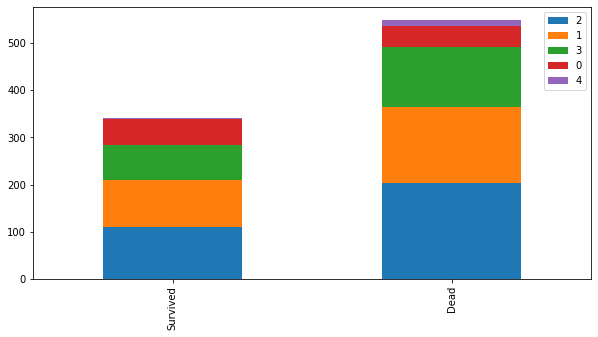

In [45]:
bar_chart("Age")

In [46]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 90.6+ KB


Cabin and Embarked still have missing values. but as we won't use them later, we will skip handling for them.

--------

### Save the cleaned data

In [48]:
data.to_csv("Data/titanic_data_cleaned.csv", index=False)

In [49]:
cleaned_data = pd.read_csv("Data/titanic_data_cleaned.csv")
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,0


------